## Сравнение методов классификации

### Выполнил: Андрей Фролов 23.М08

Описание датасета: 

- age - age in years 
- sex - (1 = male; 0 = female) 
- cp - chest pain type 
- trestbps - resting blood pressure (in mm Hg on admission to the hospital) 
- chol - serum cholestoral in mg/dl 
- fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
- restecg - resting electrocardiographic results 
- thalach - maximum heart rate achieved 
- exang - exercise induced angina (1 = yes; 0 = no) 
- oldpeak - ST depression induced by exercise relative to rest 
- slope - the slope of the peak exercise ST segment 
- ca - number of major vessels (0-3) colored by flourosopy 
- thal - 3 = normal; 6 = fixed defect; 7 = reversable defect 
- target - have disease or not (1=yes, 0=no)

Необходимо решить задачу классификации и научиться предсказывать целовой признак target имеет ли пациент заболевание сердца.

In [195]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

In [196]:
df = pd.read_csv('/Users/sergioramos4/Downloads/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Первичный анализ признаков

In [197]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Посмотрим статистику по целевому признаку

In [198]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

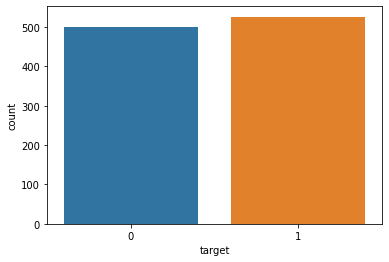

In [199]:
sns.countplot(df['target'])
plt.show()

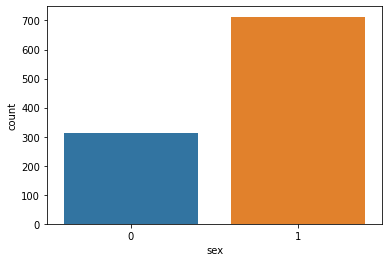

In [200]:
sns.countplot(x='sex', data=df)
plt.show()

In [201]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


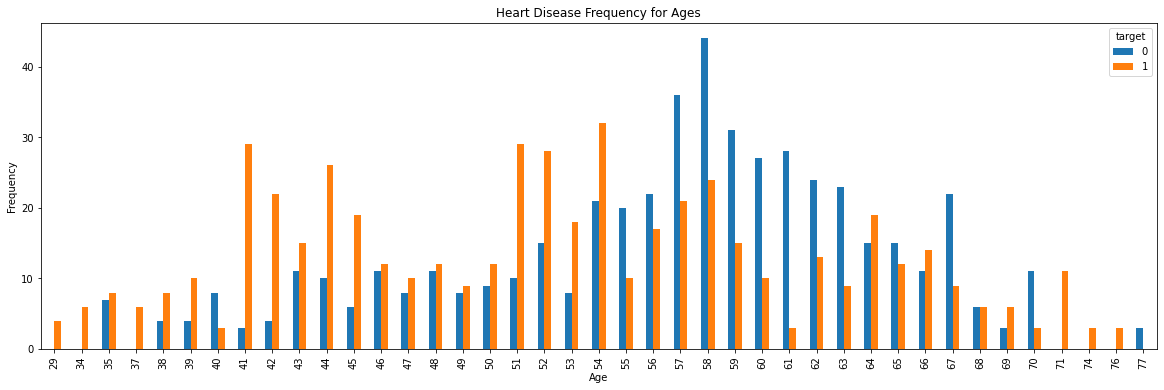

In [202]:
pd.crosstab(df.age,df.target).plot(kind="bar", figsize=(20, 6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

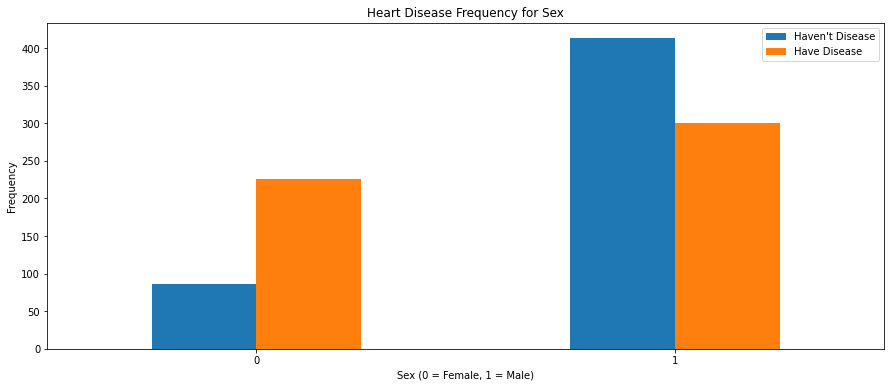

In [203]:
pd.crosstab(df.sex,df.target).plot(kind="bar", figsize=(15, 6))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

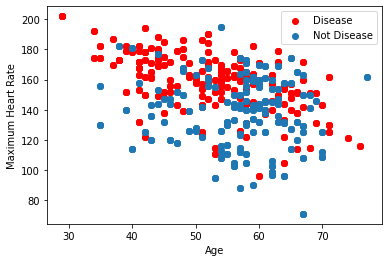

In [204]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

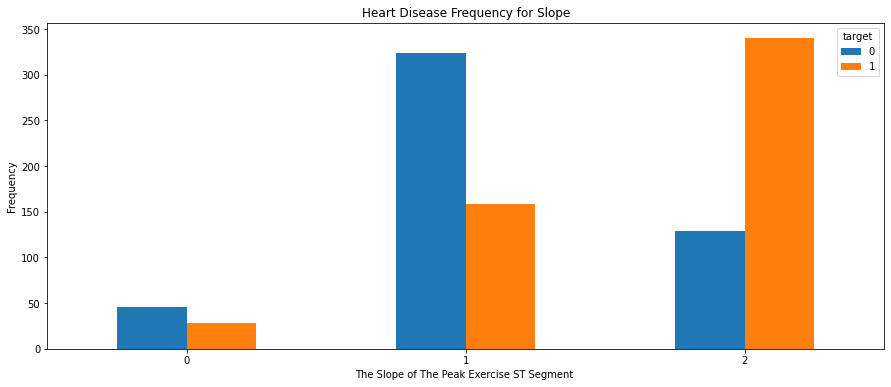

In [205]:
pd.crosstab(df.slope,df.target).plot(kind="bar", figsize=(15, 6))
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

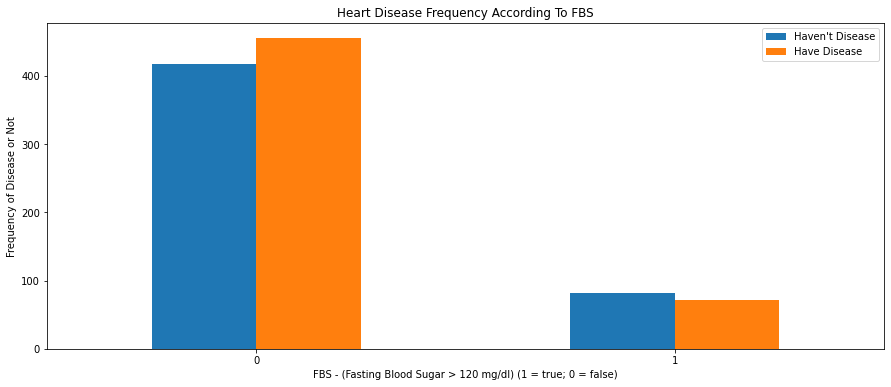

In [206]:
pd.crosstab(df.fbs,df.target).plot(kind="bar", figsize=(15, 6))
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

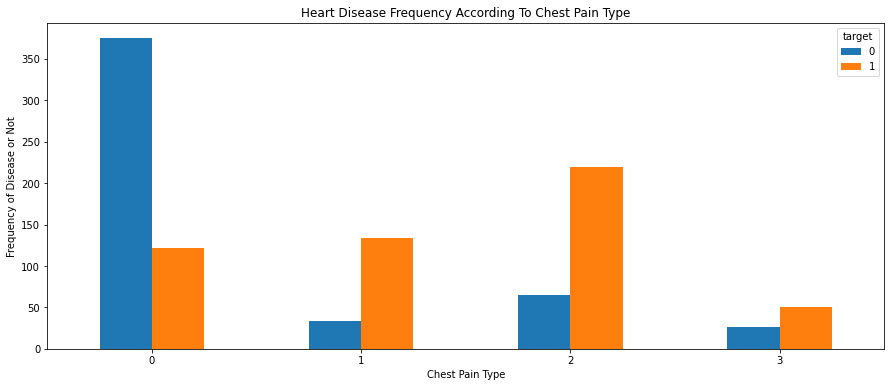

In [207]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15, 6))
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

### Преобразование категориальных признаков

In [208]:
cp_dum = pd.get_dummies(df['cp'], prefix = "cp")
thal_dum = pd.get_dummies(df['thal'], prefix = "thal")
slope_dum = pd.get_dummies(df['slope'], prefix = "slope")

frames = [df, cp_dum, thal_dum, slope_dum]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,0,125,212,0,1,168,0,1.0,...,0,0,0,0,0,0,1,0,0,1
1,53,1,0,140,203,1,0,155,1,3.1,...,0,0,0,0,0,0,1,1,0,0
2,70,1,0,145,174,0,1,125,1,2.6,...,0,0,0,0,0,0,1,1,0,0
3,61,1,0,148,203,0,1,161,0,0.0,...,0,0,0,0,0,0,1,0,0,1
4,62,0,0,138,294,1,1,106,0,1.9,...,0,0,0,0,0,1,0,0,1,0


In [209]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,0,0,0,0,0,0,1,0,0,1
1,53,1,140,203,1,0,155,1,3.1,0,...,0,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,...,0,0,0,0,0,0,1,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,...,0,0,0,0,0,0,1,0,0,1
4,62,0,138,294,1,1,106,0,1.9,3,...,0,0,0,0,0,1,0,0,1,0


### Распределение данных

In [210]:
from sklearn.model_selection import train_test_split

y = df["target"]
x = df.drop(columns=["target"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

### Масштабирование признаков

In [211]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x.columns)
x_train.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,-1.481117,0.650566,-1.117672,0.130907,-0.425115,0.931131,1.285426,-0.696311,-0.899374,-0.729676,...,-0.41792,1.586805,-0.301032,-0.054074,-0.27429,0.946059,-0.815505,-0.261793,-0.932314,1.060113
1,0.394729,0.650566,-0.378854,-0.501949,-0.425115,0.931131,-0.272293,-0.696311,-0.549171,3.041003,...,2.39280,-0.630197,-0.301032,-0.054074,-0.27429,-1.057017,1.226234,-0.261793,1.072600,-0.943296
2,-0.488022,0.650566,1.041951,-0.016759,-0.425115,-0.992832,-0.984393,-0.696311,1.376947,-0.729676,...,-0.41792,-0.630197,-0.301032,-0.054074,-0.27429,-1.057017,1.226234,-0.261793,1.072600,-0.943296
3,-0.267335,0.650566,0.132636,-0.902758,-0.425115,0.931131,0.350795,-0.696311,-0.198968,0.212994,...,2.39280,-0.630197,-0.301032,-0.054074,-0.27429,0.946059,-0.815505,-0.261793,-0.932314,1.060113
4,-0.267335,0.650566,1.155616,1.143477,2.352304,0.931131,1.240920,-0.696311,0.151236,-0.729676,...,-0.41792,-0.630197,3.321910,-0.054074,-0.27429,-1.057017,1.226234,-0.261793,1.072600,-0.943296


### Подбор наилучших признаков

In [212]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

rfecv = RFECV(estimator=LinearRegression())
rfecv.fit(x, y)

print("Наилучшее количество признаков -", rfecv.n_features_)
print("Наиболее подходящие признаки -", x_train.columns[rfecv.support_])

Наилучшее количество признаков - 20
Наиболее подходящие признаки - Index(['age', 'sex', 'trestbps', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'ca', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'thal_0', 'thal_1',
       'thal_2', 'thal_3', 'slope_0', 'slope_1', 'slope_2'],
      dtype='object')


In [213]:
print(df.columns)
unsuitableParams = set(df.columns) - set(['age', 'sex', 'cp', 'trestbps', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target'])

x_train = x_train.drop(columns=unsuitableParams)
x_test = x_test.drop(columns=unsuitableParams)
y_train = y_train.drop(columns=unsuitableParams)
y_test = y_test.drop(columns=unsuitableParams)

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'ca', 'target', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'thal_0',
       'thal_1', 'thal_2', 'thal_3', 'slope_0', 'slope_1', 'slope_2'],
      dtype='object')


### Подбор гиперпараметров

In [214]:
from sklearn.model_selection import GridSearchCV

def print_bestParams(gscv):
    print("best estimator: " + str(gscv.best_estimator_))
    print("best params: " + str(gscv.best_params_))
    print('best score:', gscv.best_score_)

In [215]:
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold

### К-ближайших соседей

In [216]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array

class KNNClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, num_neighbors=3):
        self._num_neighbors = num_neighbors

    def fit(self, X_train, y_train):
        X_train, y_train = check_X_y(X_train, y_train)
        self._X_train = X_train
        self._y_train = y_train
        return self

    def predict(self, X_test):
        X_test = check_array(X_test)
        predictions = []
        for test_row in X_test:
            neighbors_indexes = self._get_neighbors_indexes(test_row)
            label = self._most_popular_label(neighbors_indexes)
            predictions.append(label)
        return predictions

    def _get_neighbors_indexes(self, test_row):
        distances = list()
        for i, train_row in enumerate(self._X_train):
            dist = self._euclidean_distance(test_row, train_row)
            distances.append((i, dist))
        distances.sort(key=lambda tupl: tupl[1])
        neighbors_indexes = list()
        for i in range(self._num_neighbors):
            neighbors_indexes.append(distances[i][0])
        return neighbors_indexes

    def _most_popular_label(self, neighbors_indexes):
        labels = []
        for i in neighbors_indexes:
            labels.append(self._y_train[i])
        label = max(set(labels), key=labels.count)
        return label

    def _euclidean_distance(self, row1, row2):
        distance = 0.0
        for i in range(len(row1) - 1):
            distance += (row1[i] - row2[i]) ** 2
        return np.sqrt(distance)

    def get_params(self, deep=True):
        return {"num_neighbors": self._num_neighbors}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

In [217]:
param_grid = [{"num_neighbors": [3, 5, 7]}]

gscv = GridSearchCV(estimator=KNNClassifier(), cv=StratifiedKFold(5),
                       return_train_score=True, param_grid=param_grid,
                       verbose=5, n_jobs=-1)

gscv.fit(x_train, y_train)
print_bestParams(gscv)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
best estimator: KNNClassifier()
best params: {'num_neighbors': 3}
best score: 0.8833915159208718


### Logistic regression

In [218]:
from sklearn.linear_model import LogisticRegression

param_grid = {'C': np.arange(1e-05, 5, 0.1)}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gscv = GridSearchCV(LogisticRegression(), return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=StratifiedKFold(5), refit='Accuracy',
                   verbose=5, n_jobs=-1)
gscv.fit(x_train, y_train)
print_bestParams(gscv)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
best estimator: LogisticRegression(C=0.10001)
best params: {'C': 0.10001}
best score: 0.7755527345816142


### SVM

In [219]:
from sklearn.svm import SVC

C = [0.1, 0.25, 0.5, 0.75, 1, 2]
kernel = ["linear", "rbf"]
gamma = ["scale", "auto", 0.0001, 0.001, 0.01, 0.1, 1]

gscv = GridSearchCV(estimator=SVC(random_state=11), cv=StratifiedKFold(5),
                        param_grid=dict(kernel=kernel,C=C, gamma=gamma),
                       verbose=5, n_jobs=-1)
gscv.fit(x_train, y_train)
print_bestParams(gscv)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
best estimator: SVC(C=2, gamma=1, random_state=11)
best params: {'C': 2, 'gamma': 1, 'kernel': 'rbf'}
best score: 0.9387813392573786


### KNN

In [220]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = np.arange(3, 5, 7)
weights = ['uniform', 'distance']
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gscv = GridSearchCV(estimator=KNeighborsClassifier(), cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=12),
                       scoring=scoring, return_train_score=True,
                       param_grid=dict(n_neighbors=n_neighbors, weights=weights), refit='Accuracy',
                       verbose=5, n_jobs=-1)

gscv.fit(x_train, y_train)
print_bestParams(gscv)

Fitting 25 folds for each of 2 candidates, totalling 50 fits
best estimator: KNeighborsClassifier(n_neighbors=3, weights='distance')
best params: {'n_neighbors': 3, 'weights': 'distance'}
best score: 0.9632518777107798


### Naive Bayes

In [221]:
from sklearn.naive_bayes import GaussianNB

priors = [None, [0.62, 0.38], [0.5, 0.5]]
var_smoothing = np.logspace(0, -9, num=100)
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gscv = GridSearchCV(estimator=GaussianNB(), cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=23),
                      scoring=scoring, return_train_score=True,
                      param_grid=dict(priors=priors, var_smoothing=var_smoothing), refit='Accuracy',
                      n_jobs=-1)

gscv.fit(x_train, y_train)
print_bestParams(gscv)

best estimator: GaussianNB(priors=[0.5, 0.5], var_smoothing=1.0)
best params: {'priors': [0.5, 0.5], 'var_smoothing': 1.0}
best score: 0.7909594837617686


### Decision Tree

In [222]:
from sklearn.tree import DecisionTreeClassifier

criterion = ["gini", "entropy", "log_loss"]
splitter = ["best", "random"]
max_depth = [2, 3, 4, 5, 10, 20]
min_samples_split = [2, 4, 5, 10]
min_samples_leaf = [1, 2, 4, 6]
max_features = [2, 4, 6, 8]

gscv = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), cv=StratifiedKFold(5),
                       param_grid=dict(criterion=criterion,splitter=splitter, max_depth=max_depth,
                                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                       max_features= max_features), n_jobs=-1)
gscv.fit(x_train, y_train)
print_bestParams(gscv)

best estimator: DecisionTreeClassifier(max_depth=20, max_features=6, random_state=42,
                       splitter='random')
best params: {'criterion': 'gini', 'max_depth': 20, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
best score: 0.9708346556648684


## Тесты

In [223]:
results = {}

### К-ближайших соседей

In [224]:
self_knn = KNNClassifier(num_neighbors=7)
self_knn.fit(x_train, y_train)

result = self_knn.score(x_test, y_test)
results['Self KNN'] = result
print("Accuracy of self_KNN -", result)

Accuracy of self_KNN - 0.8495575221238938


### LogisticRegression

In [225]:
lr = LogisticRegression(C=2.7)
lr.fit(x_train, y_train)

result = lr.score(x_test, y_test)
results['Logistic Regression'] = result
print("Accuracy of Logistic Regression -", result)

Accuracy of Logistic Regression - 0.8023598820058997


### SVM

In [226]:
svm = SVC(C=0.75, gamma=1, kernel='rbf', random_state = 11)
svm.fit(x_train, y_train)

result = svm.score(x_test, y_test)
results['SVM'] = result
print("Accuracy of SVM -", result)

Accuracy of SVM - 0.9469026548672567


### KNN

In [227]:
knn = KNeighborsClassifier(n_neighbors=7, weights='distance')
knn.fit(x_train, y_train)

result = knn.score(x_test, y_test)
results['KNN'] = result
print("Accuracy of KNN -", result)

Accuracy of KNN - 0.9911504424778761


### Naive Bayes

In [228]:
nb = GaussianNB(priors=[0.62, 0.38], var_smoothing=0.657933224657568)
nb.fit(x_train, y_train)

result = nb.score(x_test, y_test)
results['Naive Bayes'] = result
print("Accuracy of Naive Bayes -", result)

Accuracy of Naive Bayes - 0.7787610619469026


### Decision Tree

In [229]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=2, splitter='random')
dtc.fit(x_train, y_train)

result = dtc.score(x_test, y_test)
results['Decision Tree'] = result
print("Accuracy of Decision Tree -", result)

Accuracy of Decision Tree - 0.9734513274336283


## Сравнение моделей

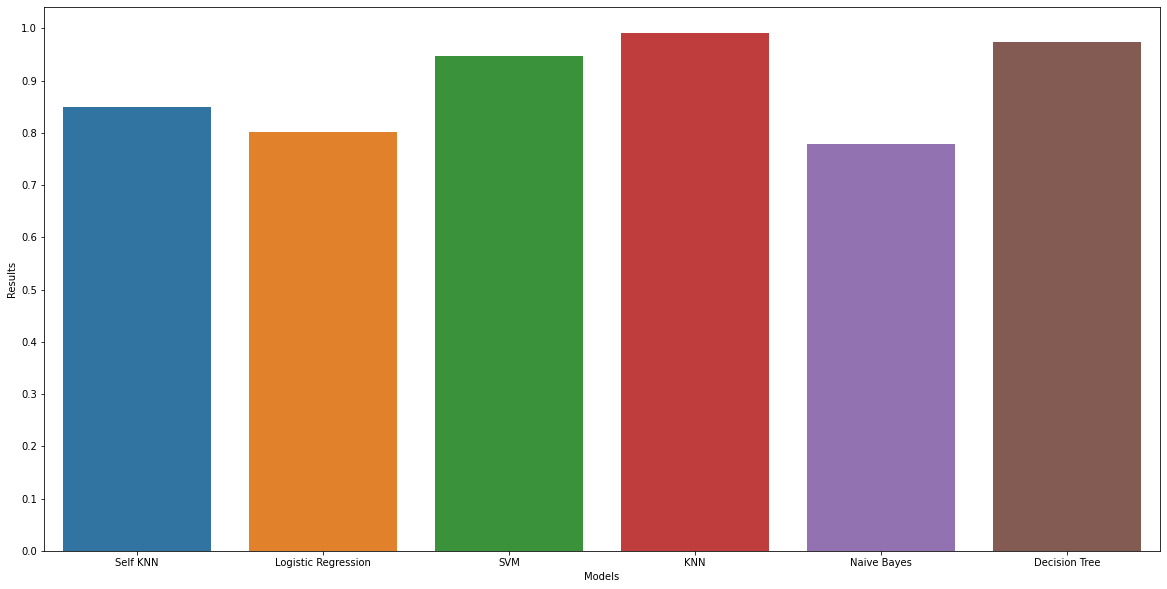

In [230]:
plt.figure(figsize=(20, 10))
plt.xlabel("Models")
plt.ylabel("Results")
plt.yticks(np.arange(0, 1.1, 0.1))

sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.show()

Наилучшие результаты получились с моделями SVM, KNN и Decision Tree

# Confusion Matrix

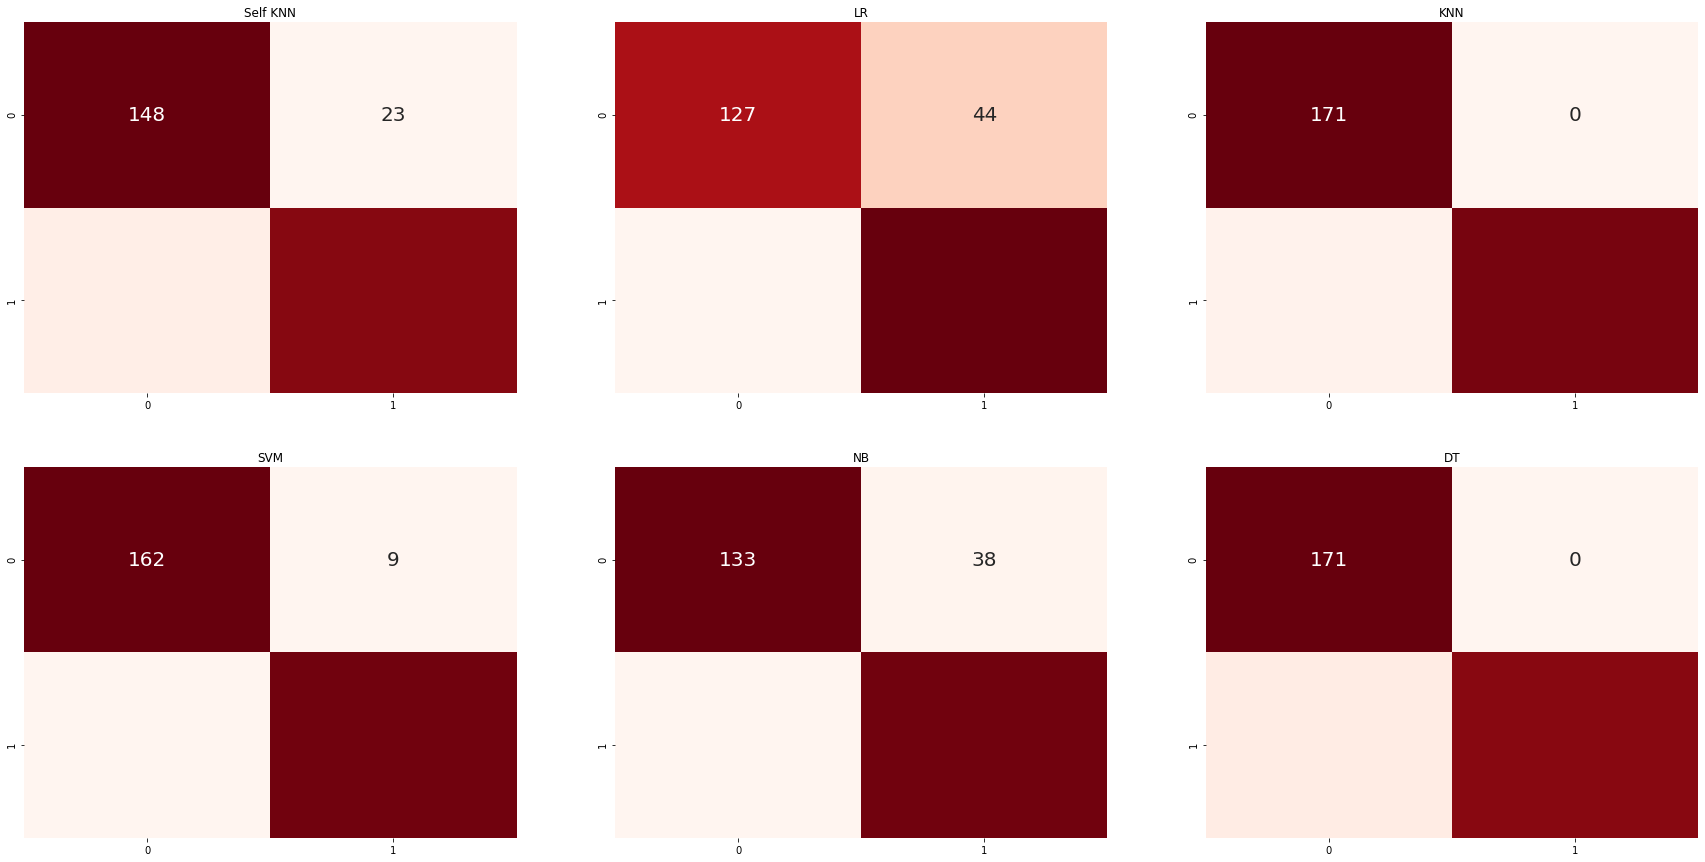

In [231]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(30, 15))

for i, (name, cm) in enumerate([
    ("Self KNN", confusion_matrix(y_test, self_knn.predict(x_test))),
    ("LR", confusion_matrix(y_test, lr.predict(x_test))),
    ("KNN", confusion_matrix(y_test, knn.predict(x_test))),
    ("SVM", confusion_matrix(y_test, svm.predict(x_test))),
    ("NB", confusion_matrix(y_test, nb.predict(x_test))),
    ("DT", confusion_matrix(y_test, dtc.predict(x_test)))
]):
    plt.subplot(2, 3, i + 1)
    plt.title(name)
    sns.heatmap(cm,annot=True,cmap="Reds",fmt="d",cbar=False, annot_kws={"size": 20})

plt.show()

## Новые данные

Описание датасета: 

- Gender: male or female
- Customer type: regular or non-regular airline customer
- Age: the actual age of the passenger
- Type of travel: the purpose of the passenger's flight (personal or business travel)
- Class: business, economy, economy plus
- Flight distance
- Inflight wifi service: satisfaction level with Wi-Fi service on board (0: not rated; 1-5)
- Departure/Arrival time convenient: departure/arrival time satisfaction level (0: not rated; 1-5)
- Ease of Online booking: online booking satisfaction rate (0: not rated; 1-5)
- Gate location: level of satisfaction with the gate location (0: not rated; 1-5)
- Food and drink: food and drink satisfaction level (0: not rated; 1-5)
- Online boarding: satisfaction level with online boarding (0: not rated; 1-5)
- Seat comfort: seat satisfaction level (0: not rated; 1-5)
- Inflight entertainment: satisfaction with inflight entertainment (0: not rated; 1-5)
- On-board service: level of satisfaction with on-board service (0: not rated; 1-5)
- Leg room service: level of satisfaction with leg room service (0: not rated; 1-5)
- Baggage handling: level of satisfaction with baggage handling (0: not rated; 1-5)
- Checkin service: level of satisfaction with checkin service (0: not rated; 1-5)
- Inflight service: level of satisfaction with inflight service (0: not rated; 1-5)
- Cleanliness: level of satisfaction with cleanliness (0: not rated; 1-5)
- Departure delay in minutes
- Arrival delay in minutes

Необходимо решить задачу классификации и научиться предсказывать целовой признак satisfaction удовлетворен ли пассажир полетом.

In [276]:
df = pd.read_csv('/Users/sergioramos4/Downloads/flight.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


## Первичный анализ признаков

In [233]:
df.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             7
satisfaction                         0
dtype: int64

Посмотрим статистику по целевому признаку

In [234]:
df['satisfaction'].value_counts()

neutral or dissatisfied    1132
satisfied                   894
Name: satisfaction, dtype: int64

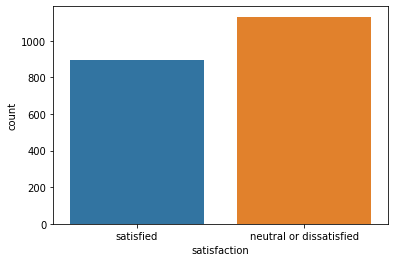

In [235]:
sns.countplot(df['satisfaction'])
plt.show()

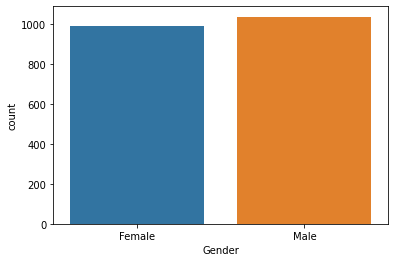

In [236]:
sns.countplot(x='Gender', data=df)
plt.show()

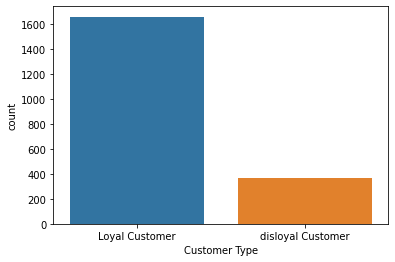

In [237]:
sns.countplot(x='Customer Type', data=df)
plt.show()

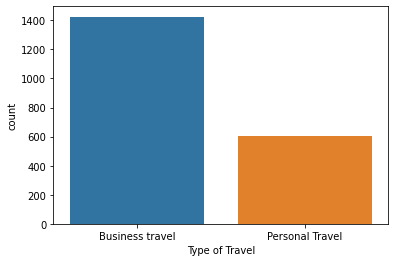

In [238]:
sns.countplot(x='Type of Travel', data=df)
plt.show()

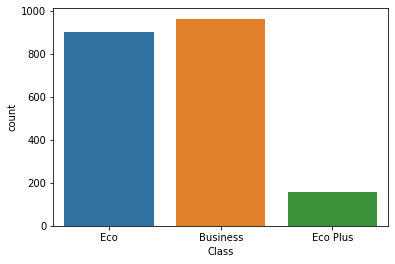

In [239]:
sns.countplot(x='Class', data=df)
plt.show()

In [240]:
df.groupby('satisfaction').mean()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
satisfaction,,,,,,,,,,,,,,,,,,,,
neutral or dissatisfied,1036.710247,65262.756184,38.298587,938.195230,2.371025,3.106890,2.533569,2.954947,2.996466,2.622792,3.056537,2.946996,3.000000,3.041519,3.349823,3.040636,3.435512,2.939929,16.861307,17.352575
satisfied,981.844519,64452.686801,42.230425,1595.065996,3.183445,2.940716,2.978747,2.969799,3.534676,4.020134,3.976510,3.974273,3.848993,3.842282,3.963087,3.602908,3.987696,3.778523,14.927293,14.713326


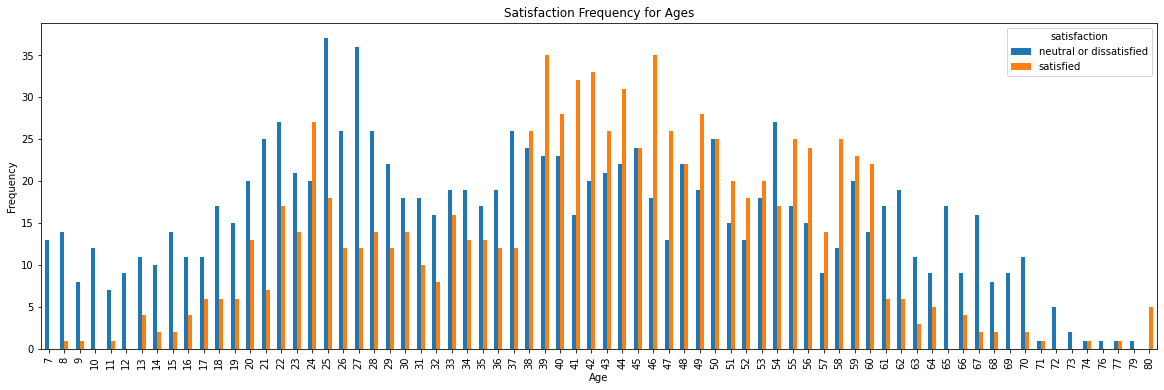

In [241]:
pd.crosstab(df.Age,df.satisfaction).plot(kind="bar", figsize=(20, 6))
plt.title('Satisfaction Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

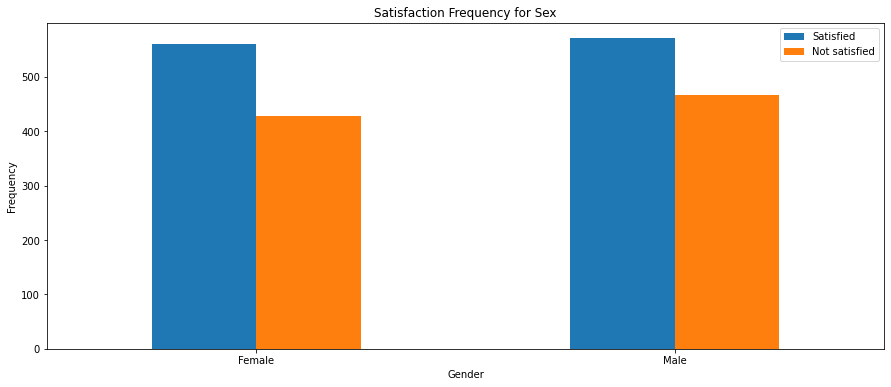

In [242]:
pd.crosstab(df.Gender,df.satisfaction).plot(kind="bar", figsize=(15, 6))
plt.title('Satisfaction Frequency for Sex')
plt.xticks(rotation=0)
plt.legend(["Satisfied", "Not satisfied"])
plt.ylabel('Frequency')
plt.show()

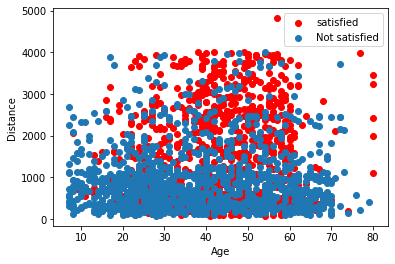

In [243]:
plt.scatter(x=df.Age[df.satisfaction=='satisfied'], y=df['Flight Distance'][(df.satisfaction=='satisfied')], c="red")
plt.scatter(x=df.Age[df.satisfaction=='neutral or dissatisfied'], y=df['Flight Distance'][(df.satisfaction=='neutral or dissatisfied')])
plt.legend(["satisfied", "Not satisfied"])
plt.xlabel("Age")
plt.ylabel("Distance")
plt.show()

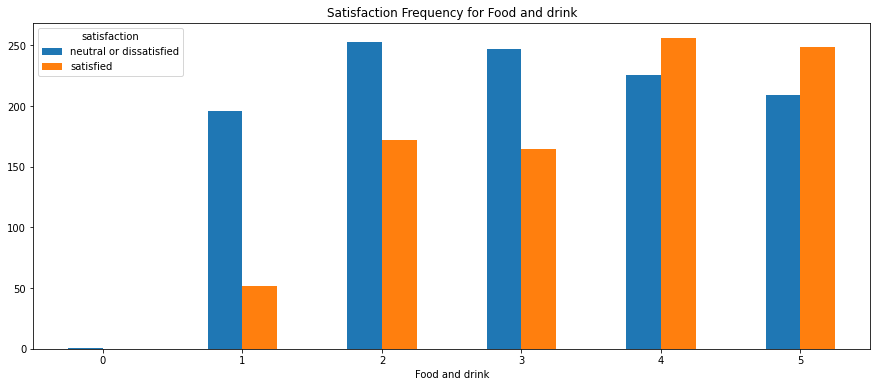

In [277]:
pd.crosstab(df['Food and drink'],df.satisfaction).plot(kind="bar", figsize=(15, 6))
plt.title('Satisfaction Frequency for Food and drink')
plt.xlabel('Food and drink')
plt.xticks(rotation = 0)
plt.show()

Чем лучше кормят, тем приятнее впечатление от полета

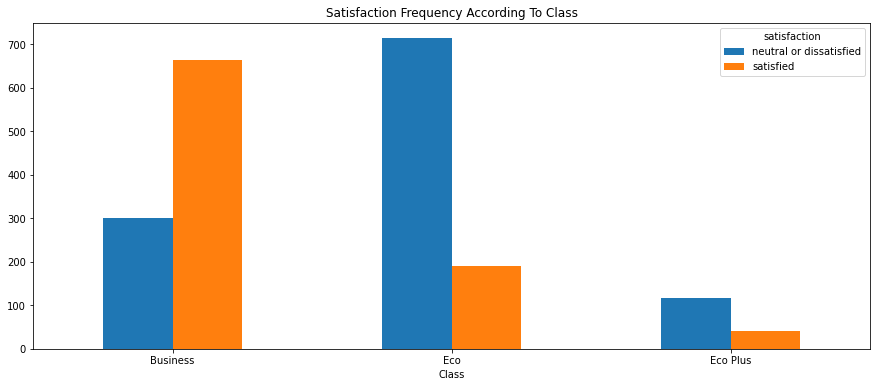

In [278]:
pd.crosstab(df.Class,df.satisfaction).plot(kind="bar", figsize=(15, 6))
plt.title('Satisfaction Frequency According To Class')
plt.xlabel('Class')
plt.xticks(rotation = 0)
plt.show()

Забота о пассажирах бизнес класса сильнее

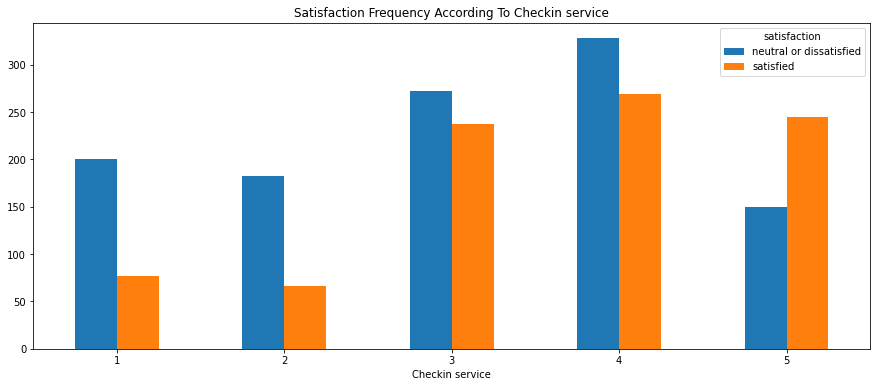

In [249]:
pd.crosstab(df['Checkin service'],df.satisfaction).plot(kind="bar",figsize=(15, 6))
plt.title('Satisfaction Frequency According To Checkin service')
plt.xlabel('Checkin service')
plt.xticks(rotation = 0)
plt.show()

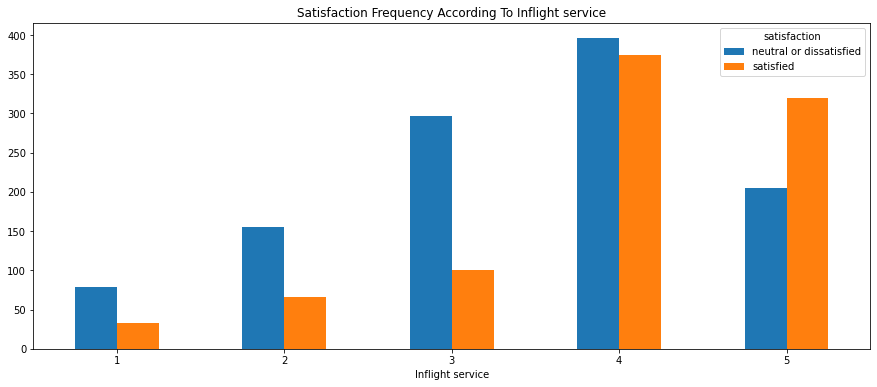

In [251]:
pd.crosstab(df['Inflight service'],df.satisfaction).plot(kind="bar",figsize=(15, 6))
plt.title('Satisfaction Frequency According To Inflight service')
plt.xlabel('Inflight service')
plt.xticks(rotation = 0)
plt.show()

### Трансформация строк в числа

In [252]:
df['Gender'].replace(['Male', 'Female'], [0, 1], inplace=True)
df['satisfaction'].replace(['neutral or dissatisfied', 'satisfied'], [0, 1], inplace=True)
df['Customer Type'].replace(['Loyal Customer', 'disloyal Customer'], [0, 1], inplace=True)
df['Type of Travel'].replace(['Business travel', 'Personal Travel'], [0, 1], inplace=True)

### Преобразование категориальных признаков

In [253]:
class_dum = pd.get_dummies(df['Class'], prefix = "Class")

frames = [df, class_dum]
df = pd.concat(frames, axis = 1)
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Business,Class_Eco,Class_Eco Plus
0,0,19556,1,0,52,0,Eco,160,5,4,...,5,2,5,5,50,44.0,1,0,1,0
1,1,90035,1,0,36,0,Business,2863,1,1,...,4,3,4,5,0,0.0,1,1,0,0
2,2,12360,0,1,20,0,Eco,192,2,0,...,3,2,2,2,0,0.0,0,0,1,0
3,3,77959,0,0,44,0,Business,3377,0,0,...,1,3,1,4,0,6.0,1,1,0,0
4,4,36875,1,0,49,0,Eco,1182,2,3,...,2,4,2,4,0,20.0,1,0,1,0


In [254]:
df = df.drop(columns = ['Class', 'id', 'Unnamed: 0'])
df = df.dropna()
df.head()

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Business,Class_Eco,Class_Eco Plus
0,1,0,52,0,160,5,4,3,4,3,...,5,2,5,5,50,44.0,1,0,1,0
1,1,0,36,0,2863,1,1,3,1,5,...,4,3,4,5,0,0.0,1,1,0,0
2,0,1,20,0,192,2,0,2,4,2,...,3,2,2,2,0,0.0,0,0,1,0
3,0,0,44,0,3377,0,0,0,2,3,...,1,3,1,4,0,6.0,1,1,0,0
4,1,0,49,0,1182,2,3,4,3,4,...,2,4,2,4,0,20.0,1,0,1,0


### Распределение данных

In [255]:
from sklearn.model_selection import train_test_split

y = df["satisfaction"]
x = df.drop(columns=["satisfaction"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

### Масштабирование признаков

In [256]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x.columns)
x_train.head()

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus
0,-1.007424,-0.476298,-0.775734,-0.634421,-0.401534,0.175907,-0.033050,0.173879,0.034926,-0.938951,...,-1.880118,-0.543424,0.535754,-2.389773,-0.996935,-0.420563,-0.425484,1.033092,-0.895917,-0.276465
1,-1.007424,2.099524,-1.556522,-0.634421,0.369215,-0.571973,-0.699971,-0.545035,0.034926,1.309210,...,-1.103485,-0.543424,-0.252428,0.266549,1.248245,-0.420563,-0.425484,-0.967968,1.116175,-0.276465
2,-1.007424,-0.476298,-0.385341,-0.634421,-0.718495,-0.571973,-0.699971,-0.545035,-0.739170,-0.938951,...,1.226414,1.185303,0.535754,1.151990,0.499851,-0.099682,-0.129599,1.033092,-0.895917,-0.276465
3,-1.007424,2.099524,-1.231194,-0.634421,-0.781494,-0.571973,-0.699971,-1.263949,0.809022,-1.688338,...,0.449781,-0.543424,0.535754,-0.618892,-1.745328,-0.233382,-0.425484,-0.967968,1.116175,-0.276465
4,0.992631,-0.476298,0.655709,1.576241,-0.057995,-1.319853,-0.033050,-1.263949,0.809022,-0.938951,...,-1.880118,-0.543424,-0.252428,-0.618892,-0.996935,1.397763,1.780205,-0.967968,1.116175,-0.276465


### Подбор наилучших признаков

In [257]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

rfecv = RFECV(estimator=LinearRegression())
rfecv.fit(x, y)

print("Наилучшее количество признаков -", rfecv.n_features_)
print("Наиболее подходящие признаки -", x_train.columns[rfecv.support_])

Наилучшее количество признаков - 24
Наиболее подходящие признаки - Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Flight Distance',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Class_Business', 'Class_Eco', 'Class_Eco Plus'],
      dtype='object')


In [258]:
print(df.columns)
unsuitableParams = set(df.columns) - set(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Flight Distance',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Class_Business', 'Class_Eco', 'Class_Eco Plus', 'satisfaction'])

x_train = x_train.drop(columns=unsuitableParams)
x_test = x_test.drop(columns=unsuitableParams)
y_train = y_train.drop(columns=unsuitableParams)
y_test = y_test.drop(columns=unsuitableParams)

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Flight Distance',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Class_Business', 'Class_Eco', 'Class_Eco Plus'],
      dtype='object')


### К-ближайших соседей

In [259]:
param_grid = [{"num_neighbors": [3, 5, 7]}]

gscv = GridSearchCV(estimator=KNNClassifier(), cv=StratifiedKFold(5),
                       return_train_score=True, param_grid=param_grid,
                       verbose=5, n_jobs=-1)

gscv.fit(x_train, y_train)
print_bestParams(gscv)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
best estimator: KNNClassifier()
best params: {'num_neighbors': 3}
best score: 0.8779445127784611


### Logistic regression

In [260]:
from sklearn.linear_model import LogisticRegression

param_grid = {'C': np.arange(1e-05, 5, 0.1)}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gscv = GridSearchCV(LogisticRegression(), return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=StratifiedKFold(5), refit='Accuracy',
                   verbose=5, n_jobs=-1)
gscv.fit(x_train, y_train)
print_bestParams(gscv)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
best estimator: LogisticRegression(C=0.10001)
best params: {'C': 0.10001}
best score: 0.869069290692907


### SVM

In [261]:
from sklearn.svm import SVC

C = [0.1, 0.25, 0.5, 0.75, 1, 2]
kernel = ["linear", "rbf"]
gamma = ["scale", "auto", 0.0001, 0.001, 0.01, 0.1, 1]

gscv = GridSearchCV(estimator=SVC(random_state=11), cv=StratifiedKFold(5),
                        param_grid=dict(kernel=kernel,C=C, gamma=gamma),
                       verbose=5, n_jobs=-1)
gscv.fit(x_train, y_train)
print_bestParams(gscv)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
best estimator: SVC(C=2, random_state=11)
best params: {'C': 2, 'gamma': 'scale', 'kernel': 'rbf'}
best score: 0.9260489271559382


### KNN

In [262]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = np.arange(3, 5, 7)
weights = ['uniform', 'distance']
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gscv = GridSearchCV(estimator=KNeighborsClassifier(), cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=12),
                       scoring=scoring, return_train_score=True,
                       param_grid=dict(n_neighbors=n_neighbors, weights=weights), refit='Accuracy',
                       verbose=5, n_jobs=-1)

gscv.fit(x_train, y_train)
print_bestParams(gscv)

Fitting 25 folds for each of 2 candidates, totalling 50 fits
best estimator: KNeighborsClassifier(n_neighbors=3)
best params: {'n_neighbors': 3, 'weights': 'uniform'}
best score: 0.8754451277846111


### Naive Bayes

In [263]:
from sklearn.naive_bayes import GaussianNB

priors = [None, [0.62, 0.38], [0.5, 0.5]]
var_smoothing = np.logspace(0, -9, num=100)
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gscv = GridSearchCV(estimator=GaussianNB(), cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=23),
                      scoring=scoring, return_train_score=True,
                      param_grid=dict(priors=priors, var_smoothing=var_smoothing), refit='Accuracy',
                      n_jobs=-1)

gscv.fit(x_train, y_train)
print_bestParams(gscv)

best estimator: GaussianNB(priors=[0.5, 0.5], var_smoothing=0.006579332246575682)
best params: {'priors': [0.5, 0.5], 'var_smoothing': 0.006579332246575682}
best score: 0.8430558972256388


### Decision Tree

In [264]:
from sklearn.tree import DecisionTreeClassifier

criterion = ["gini", "entropy", "log_loss"]
splitter = ["best", "random"]
max_depth = [2, 3, 4, 5, 10, 20]
min_samples_split = [2, 4, 5, 10]
min_samples_leaf = [1, 2, 4, 6]
max_features = [2, 4, 6, 8]

gscv = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), cv=StratifiedKFold(5),
                       param_grid=dict(criterion=criterion,splitter=splitter, max_depth=max_depth,
                                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                       max_features= max_features), n_jobs=-1)
gscv.fit(x_train, y_train)
print_bestParams(gscv)

best estimator: DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features=8,
                       min_samples_leaf=2, min_samples_split=10,
                       random_state=42, splitter='random')
best params: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 8, 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}
best score: 0.8979363126964603


## Тесты

In [265]:
results = {}

### К-ближайших соседей

In [266]:
self_knn = KNNClassifier(num_neighbors=7)
self_knn.fit(x_train, y_train)

result = self_knn.score(x_test, y_test)
results['Self KNN'] = result
print("Accuracy of self_KNN -", result)

Accuracy of self_KNN - 0.896551724137931


### LogisticRegression

In [267]:
lr = LogisticRegression(C=2.7)
lr.fit(x_train, y_train)

result = lr.score(x_test, y_test)
results['Logistic Regression'] = result
print("Accuracy of Logistic Regression -", result)

Accuracy of Logistic Regression - 0.8725637181409296


### SVM

In [268]:
svm = SVC(C=0.75, gamma=1, kernel='rbf', random_state = 11)
svm.fit(x_train, y_train)

result = svm.score(x_test, y_test)
results['SVM'] = result
print("Accuracy of SVM -", result)

Accuracy of SVM - 0.5892053973013494


### KNN

In [269]:
knn = KNeighborsClassifier(n_neighbors=7, weights='distance')
knn.fit(x_train, y_train)

result = knn.score(x_test, y_test)
results['KNN'] = result
print("Accuracy of KNN -", result)

Accuracy of KNN - 0.8935532233883059


### Naive Bayes

In [270]:
nb = GaussianNB(priors=[0.62, 0.38], var_smoothing=0.657933224657568)
nb.fit(x_train, y_train)

result = nb.score(x_test, y_test)
results['Naive Bayes'] = result
print("Accuracy of Naive Bayes -", result)

Accuracy of Naive Bayes - 0.8470764617691154


### Decision Tree

In [271]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=2, splitter='random')
dtc.fit(x_train, y_train)

result = dtc.score(x_test, y_test)
results['Decision Tree'] = result
print("Accuracy of Decision Tree -", result)

Accuracy of Decision Tree - 0.8260869565217391


## Сравнение моделей

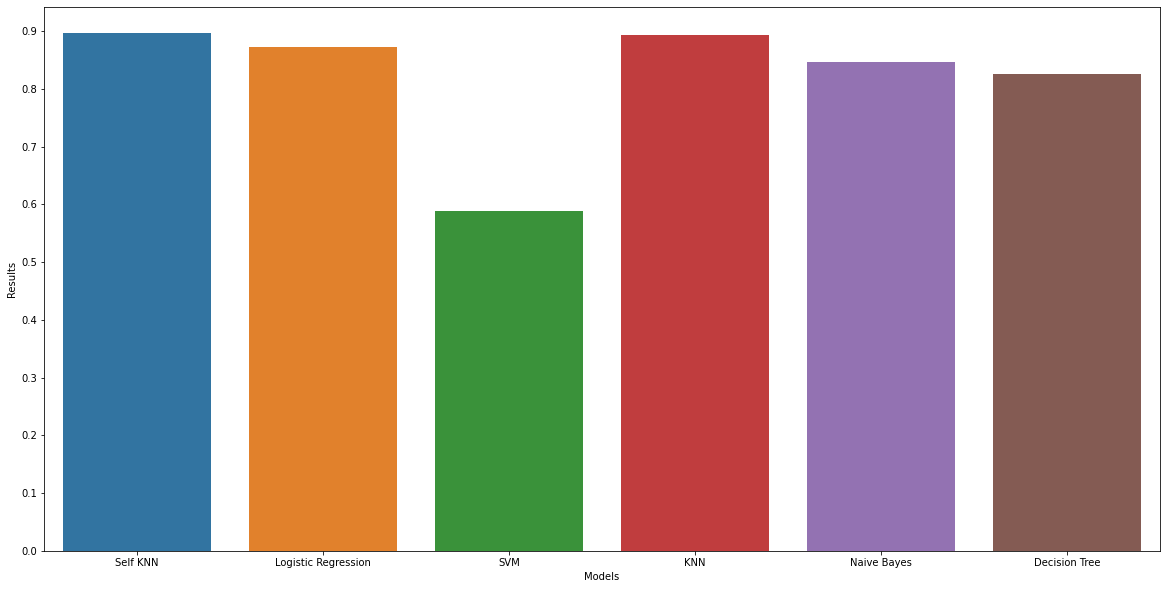

In [272]:
plt.figure(figsize=(20, 10))
plt.xlabel("Models")
plt.ylabel("Results")
plt.yticks(np.arange(0, 1.1, 0.1))

sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.show()

Собственная и библиотечная реализация KNN лидируют, но очень просел SVM

# Confusion Matrix

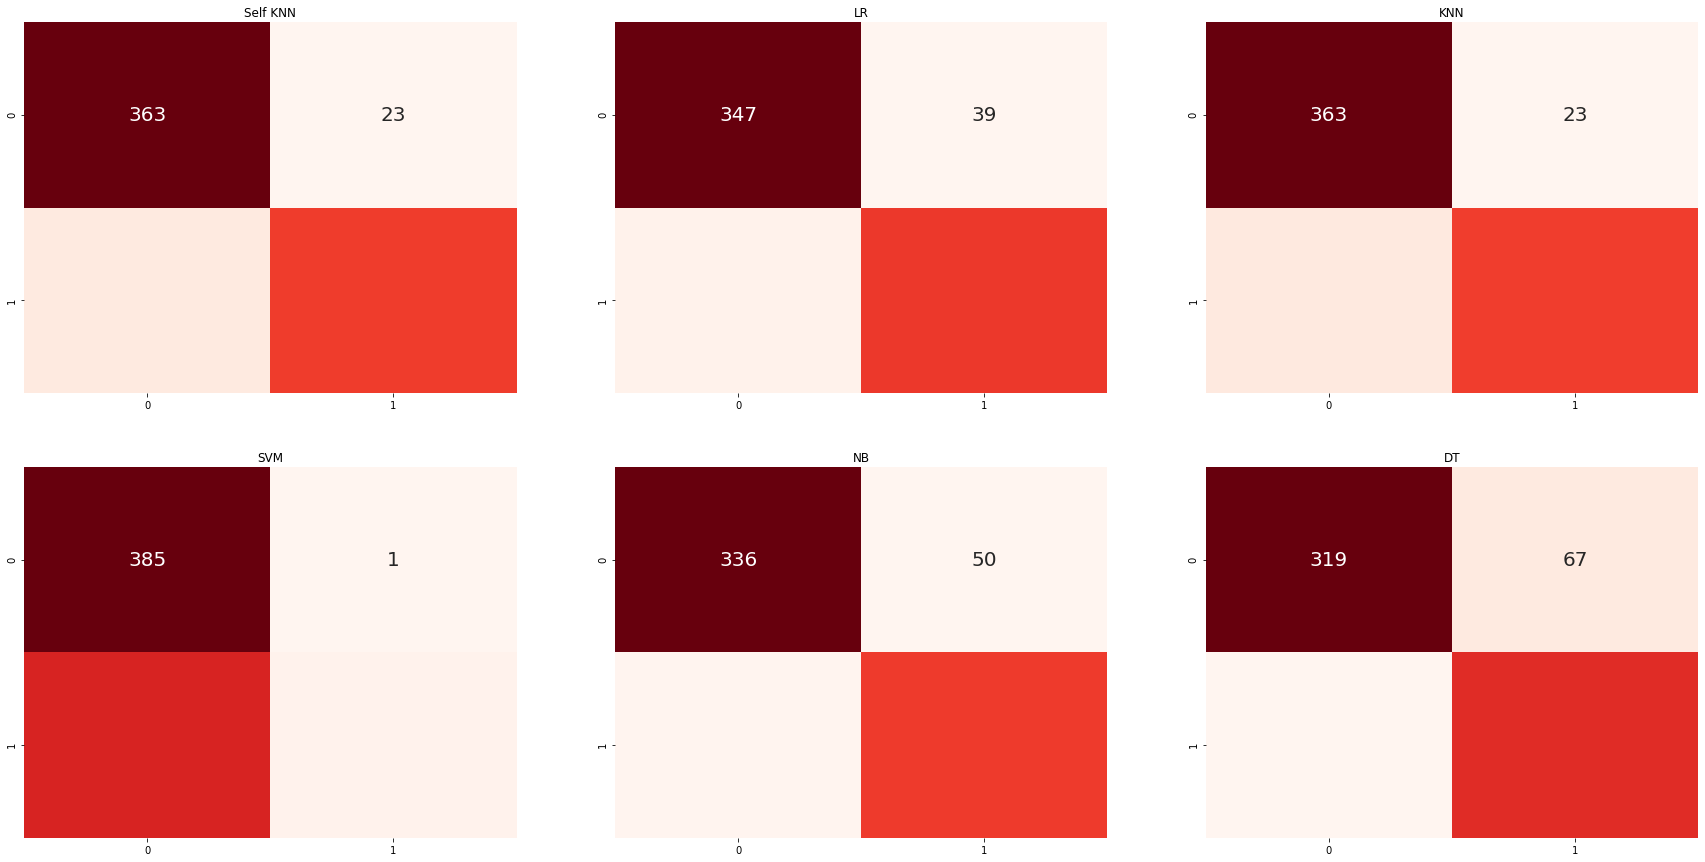

In [273]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(30, 15))

for i, (name, cm) in enumerate([
    ("Self KNN", confusion_matrix(y_test, self_knn.predict(x_test))),
    ("LR", confusion_matrix(y_test, lr.predict(x_test))),
    ("KNN", confusion_matrix(y_test, knn.predict(x_test))),
    ("SVM", confusion_matrix(y_test, svm.predict(x_test))),
    ("NB", confusion_matrix(y_test, nb.predict(x_test))),
    ("DT", confusion_matrix(y_test, dtc.predict(x_test)))
]):
    plt.subplot(2, 3, i + 1)
    plt.title(name)
    sns.heatmap(cm,annot=True,cmap="Reds",fmt="d",cbar=False, annot_kws={"size": 20})

plt.show()